<a href="https://colab.research.google.com/github/My990813/Applied-Data-Science-Project-One/blob/main/Info_reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd

# Load the dataset
file_path = "/content/Final Cleaning Data(1).csv"
df = pd.read_csv(file_path)

# Display the first few rows to understand its structure
df.head()

,Unnamed: 0.1,Unnamed: 0,kdrama_id,drama_name,year,director,screenwriter,country,type,tot_eps,duration,start_dt,end_dt,aired_on,org_net,content_rt,synopsis,rank,pop
0,0,0,661d4193916c4e71a2c70473ab11e9e8,Sing My Crush,2023,['So Joon Moon'],Others,South Korea,Drama,8,1500,8/2/2023,8/2/2023,Wednesday,Others,Not Yet Rated,Follow the story of acquaintances Ba Ram and H...,1484,2238
1,1,1,5ffcbeaa17114714af1959129984274c,D.P. Season 2,2023,Others,['Kim Bo Tong'],South Korea,Drama,6,3000,7/28/2023,7/28/2023,Friday,Netflix,15+ - Teens 15 or older,This unfolding story ensues when military dese...,164,1084
2,2,2,65075cb9c1a54be4a441cee6f16c9fdf,Shadow Detective Season 2,2023,['Han Dong Hwa'],"['Song Jung Woo', 'Hwang Seol Hun']",South Korea,Drama,8,3300,7/5/2023,7/26/2023,Wednesday,Disney+ Hulu,15+ - Teens 15 or older,Unfolds the ultimate counterattack of veteran ...,2443,6915
3,3,4,04c1fe41948e464fb440001831d74d41,Celebrity,2023,['Kim Chul Gyu'],['Kim Yi Young'],South Korea,Drama,12,2700,6/30/2023,6/30/2023,Friday,Netflix,18+ Restricted (violence & profanity),Fame. Money. Power. One young woman fights to ...,826,547
4,4,5,2e06f3f0c28942fd8b8e4780f5e666dc,Blue Temperature,2023,Others,Others,South Korea,Drama,4,420,6/28/2023,7/19/2023,Wednesday,Naver TV Cast,Not Yet Rated,"Set in the picturesque town of Cheongdo, this ...",47245,15405


Intercept: 35730.71113426697
Mean Squared Error: 5086203.25711019
R-squared Score: 0.7430384106113636

Feature Coefficients:
     Feature  Coefficient
0      year   -16.078868
1   tot_eps     7.057345
2  duration    -0.631723
3      rank     0.168499


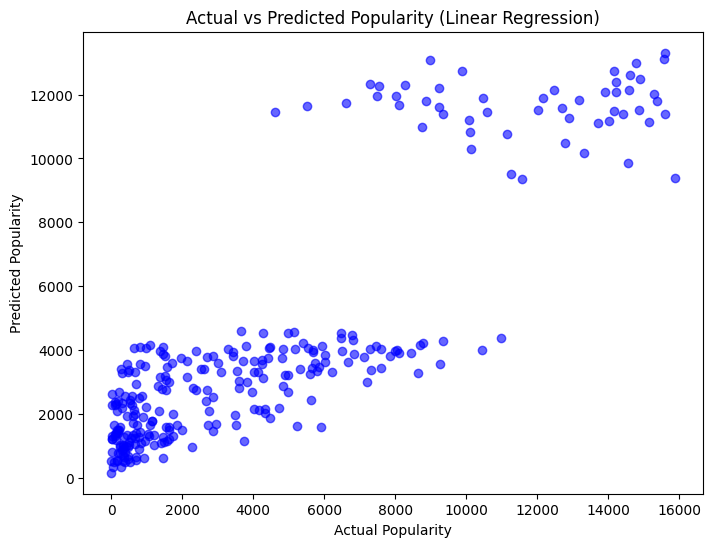

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Select independent variables (X) and dependent variable (y)
X = df[['year', 'tot_eps', 'duration', 'rank']]
y = df['pop']

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display results
print(f"Intercept: {model.intercept_}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")

# Display feature coefficients
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print("\nFeature Coefficients:\n", coefficients)

# Visualizing actual vs predicted values
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.6, color="blue")
plt.xlabel("Actual Popularity")
plt.ylabel("Predicted Popularity")
plt.title("Actual vs Predicted Popularity (Linear Regression)")
plt.show()

This is a simple linear regression without standardization and normalization.

In [17]:
# With Standardization and normalization

!pip install pandas scikit-learn

# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Select independent variables (X) and dependent variable (y)
X = df[['year', 'tot_eps', 'duration', 'rank']]
y = df['pop']

# Standardization (Z-score Normalization)
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# Normalization (Min-Max Scaling)
min_max_scaler = MinMaxScaler()
X_normalized = min_max_scaler.fit_transform(X)

# Splitting the standardized data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_standardized, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display results
print(f"Intercept: {model.intercept_}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")

# Display feature coefficients
coefficients = pd.DataFrame({'Feature': ['year', 'tot_eps', 'duration', 'rank'], 'Coefficient': model.coef_})
print("\nFeature Coefficients:\n", coefficients)


Intercept: 3948.588484913893
Mean Squared Error: 5086203.25711019
R-squared Score: 0.7430384106113636

Feature Coefficients:
     Feature  Coefficient
0      year   -38.160081
1   tot_eps   195.413427
2  duration  -929.395369
3      rank  3146.914373


Rank was already strongly correlated with popularity, but because it had a larger scale originally, it may have had a smaller coefficient in the unstandardized model. After standardization, its impact is clearer, leading to a larger coefficient, indicating that it has the strongest influence in predicting popularity.

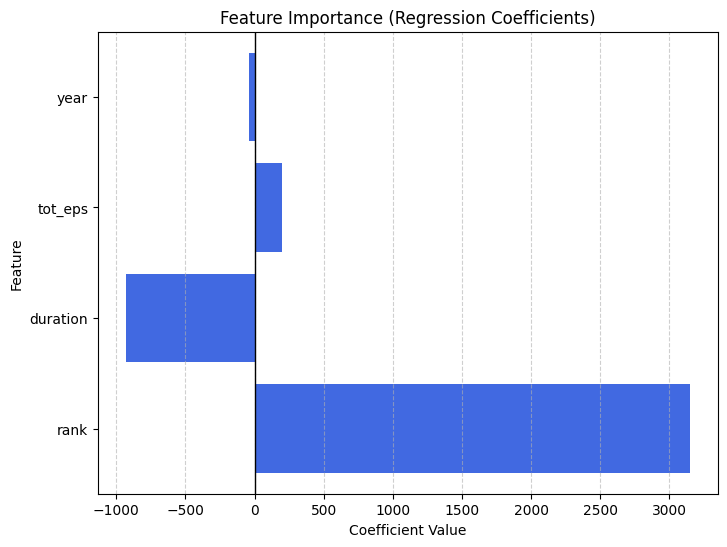

In [16]:
# Plot Feature Importance (Bar Chart)
plt.figure(figsize=(8, 6))
coefficients = coefficients.sort_values(by='Coefficient', key=abs, ascending=False)  # Sort by absolute value
plt.barh(coefficients['Feature'], coefficients['Coefficient'], color='royalblue')
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.title("Feature Importance (Regression Coefficients)")
plt.axvline(x=0, color='black', linewidth=1)  # Reference line at 0
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

From the bar chart, rank has the strongest positive impact, suggesting that higher-ranked dramas are significantly more popular. Duration, on the other hand, has a substantial negative effect, indicating that dramas aired for a longer period tend to be less popular, possibly due to audiences losing interest over time. The number of episodes has a smaller but still positive influence, implying that dramas with more episodes may attract greater engagement. Finally, the year of release has the least impact, showing that a drama’s release year is not a major factor in determining its popularity.

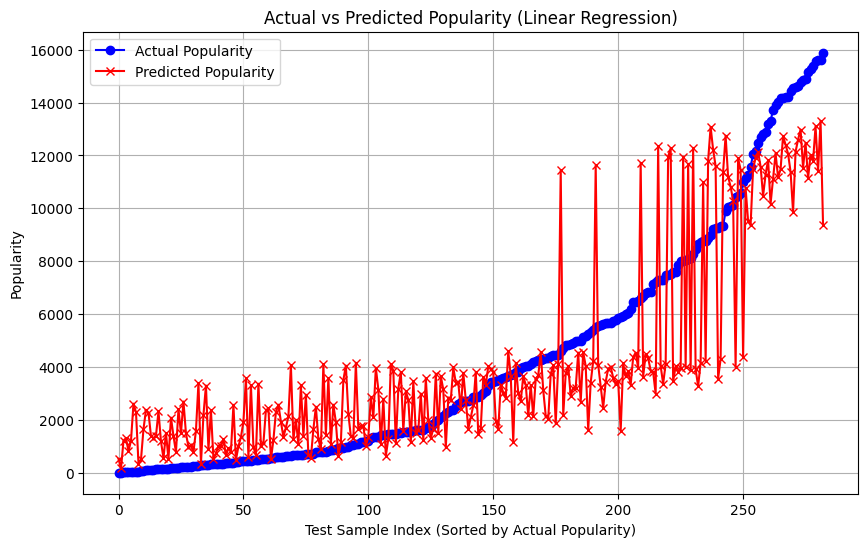

In [12]:
# Sorting values for better visualization
sorted_indices = np.argsort(y_test.values)
y_test_sorted = np.array(y_test)[sorted_indices]
y_pred_sorted = np.array(y_pred)[sorted_indices]

# Plot actual vs. predicted popularity
plt.figure(figsize=(10,6))
plt.plot(y_test_sorted, label="Actual Popularity", linestyle='-', marker='o', color='blue')
plt.plot(y_pred_sorted, label="Predicted Popularity", linestyle='-', marker='x', color='red')

# Labels and title
plt.xlabel("Test Sample Index (Sorted by Actual Popularity)")
plt.ylabel("Popularity")
plt.title("Actual vs Predicted Popularity (Linear Regression)")
plt.legend()
plt.grid()

# Show plot
plt.show()

The actual vs. predicted popularity of K-dramas can tell us some insights about the model fit.

The blue line represents the actual popularity values, sorted in increasing order.
The red crosses represent the predicted popularity values from the linear regression model.

The predicted values roughly follow the increasing trend of actual popularity, indicating that the model is capturing some underlying patterns.

There is significant scatter in the predicted values, especially in the higher popularity range. This suggests that the model struggles to accurately predict very popular dramas. The linear regression model seems to perform better for less popular dramas (left side of the graph), where the red points are closer to the blue line. The variance increases significantly as popularity rises.

In [14]:
# T-Test on Regression Variables
t_test_results = {}
for feature in ['year', 'tot_eps', 'duration', 'rank']:
    t_stat, p_value = ttest_ind(X_train[:, X.columns.get_loc(feature)], X_test[:, X.columns.get_loc(feature)], equal_var=False)
    t_test_results[feature] = {"T-statistic": t_stat, "P-value": p_value}

t_test_df = pd.DataFrame.from_dict(t_test_results, orient='index')
print("\nT-Test Results on Standardized Variables:\n", t_test_df)



T-Test Results on Standardized Variables:
           T-statistic   P-value
year        -0.028435  0.977328
tot_eps      0.303723  0.761483
duration     2.654089  0.008238
rank        -0.792022  0.428793


In this T-test on standardized variables, the null hypothesis (H₀) states that there is no significant difference in the mean values of each feature between the training and test sets. The results indicate that most features, including year, total episodes (tot_eps), and rank, are well-balanced between the training and test sets, as their high p-values suggest no significant difference in their distributions. However, duration stands out with a statistically significant p-value (0.008), implying a potential distribution shift between the two sets. This suggests that the model might face inconsistencies when predicting dramas with extreme duration values, possibly affecting overall performance.